# <span style="color:Orange"> Homework 2 </span>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

## <span style="color:red"> Problem 1 </span>
The velocity (v) of an electric bicycle with the power output (P) of the motor is described  
by the following differential equation:  
![dv_dt_p_mv](images/dv_dt_p_mv.png)
where, m is total mass (bicycle + rider)  

Given:  
v(0) = 4.0 m/s  
P = 400 Watt    
m = 70 kg    
∆t (or h) = 0.1 sec  
Solve the v(t) by Euler method for time interval [0, 200].  
Compare the result with the exact solution,  
![v](images/v.png)  
(plot v against t).  
(you may vary time step to see the accuracy variation)

### <span style="color:skyblue"> Solution Problem 1</span>
First order approximation by Euler's method,  
![Euler Method](images/method_euler.png)

In [2]:
################################################################################
######################## euler #################################################
def euler(f, a, b, dt, x_0, x_exact = None):
    
    """
    General info:
        This function returns solutions to the dependent variable (x's) of a
        differential equation for the given range of independent variable (t).
    Arguments:
        f       : 1st derivative of function
        a       : Lower limit
        b       : Higher limit
        dt      : Time step
        x_0     : x at time 0 in m/s
        x_exact : Exact solution (for plot comparision)
    """
    
    t    = np.linspace(a, b, int((b-a)/dt))    # >> Independent variable t
    x    = [0] * int((b-a)/dt)                 # >> Dependent variable x
    x[0] = x_0
    
    # Loop for getting x's >>
    for i in range(len(t) - 1):
        x[i+1] = x[i] + f(x[i], t[i]) * dt
    
    # Plotting results >>
    fig  = plt.figure(figsize = (10, 10))
    axes = plt.gca()
    if x_exact: axes.plot( t, x_exact(t),        # >> Plotting exact solution
                           color     = "blue",
                           label     = "Exact solution" )
    axes.plot(             t, x,                 # >> Plotting euler's solution
                           color     = "green",
                           label     = "Eluer's solution" )
    
    # Setting plot elements >>
    label_xaxis = "t"
    label_yaxis = "v"
    title       = label_yaxis + " vs " + label_xaxis + ", dt = " + str(dt)
    axes.set_title(title)
    axes.set_xlabel(label_xaxis + " (sec)")
    axes.set_ylabel(label_yaxis + " (m/s)")
    axes.legend()
    
    return None
######################## euler #################################################
################################################################################


################################################################################
######################## Given #################################################
P   = 400 # >> Power output of motor in Watts
m   = 70  # >> Total mass (bicycle + rider) in kg
######################## Given #################################################
################################################################################


################################################################################
######################## der_1st ###############################################
def der_1st(v, t):
    return( P / (m*v) )
######################## der_1st ###############################################
################################################################################


################################################################################
######################## v_exact ###############################################
def v_exact(t):
    v_0 = 4                  # >> Velocity at time 0 in m/s
    return( np.sqrt( v_0**2 + 2*P*t/m ) )
######################## v_exact ###############################################
################################################################################

## <span style="color:green"> Final Solution Problem 1</span>

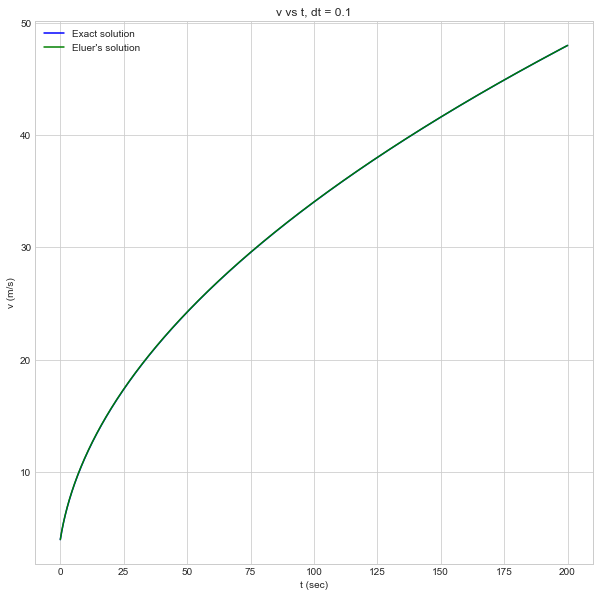

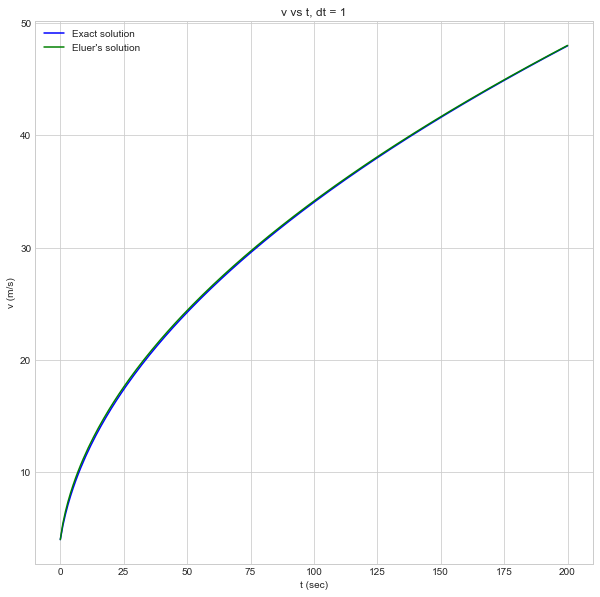

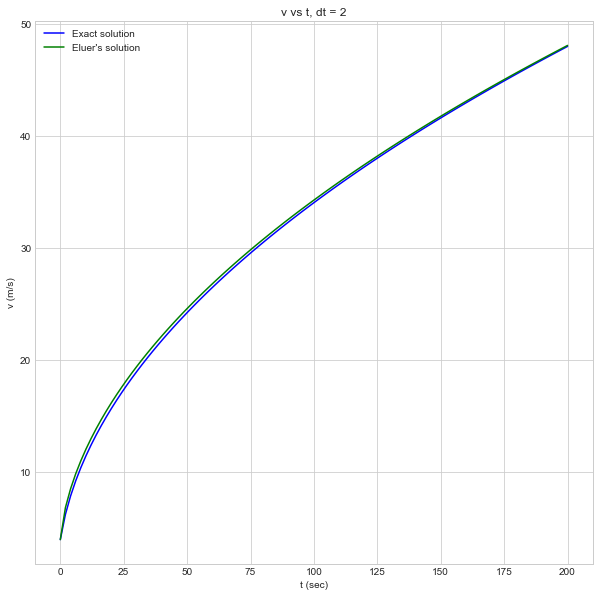

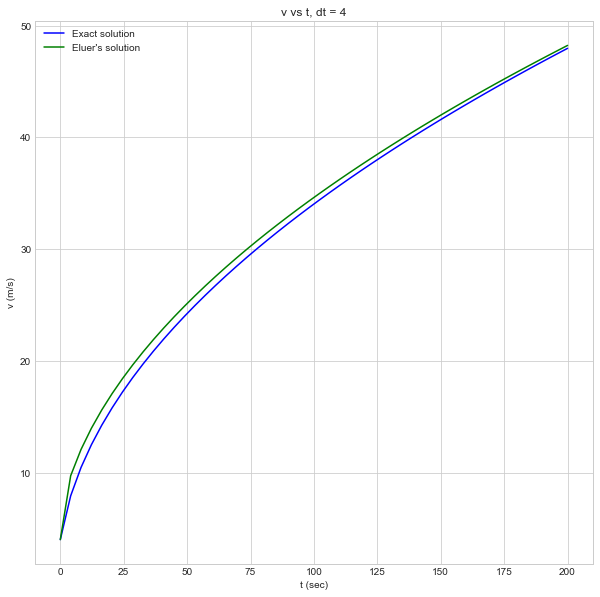

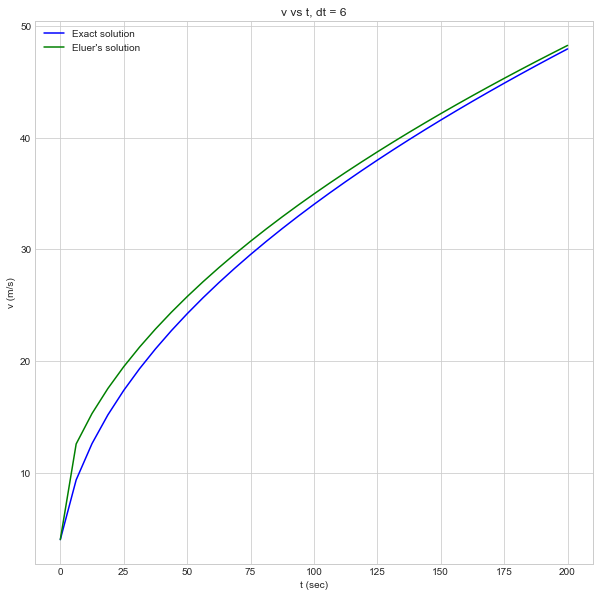

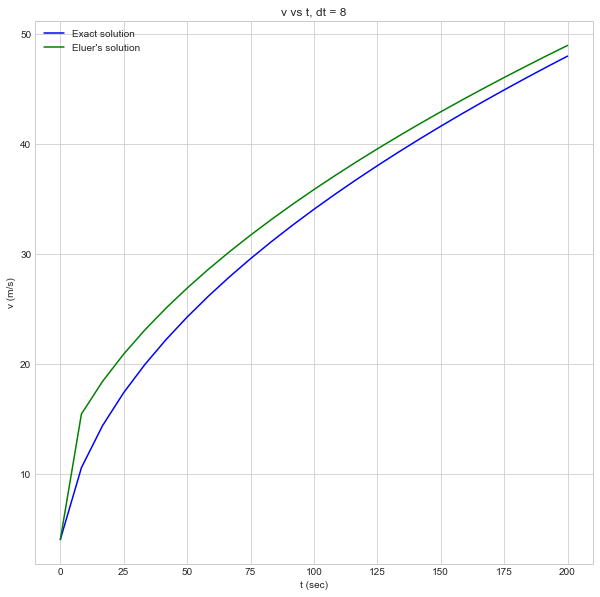

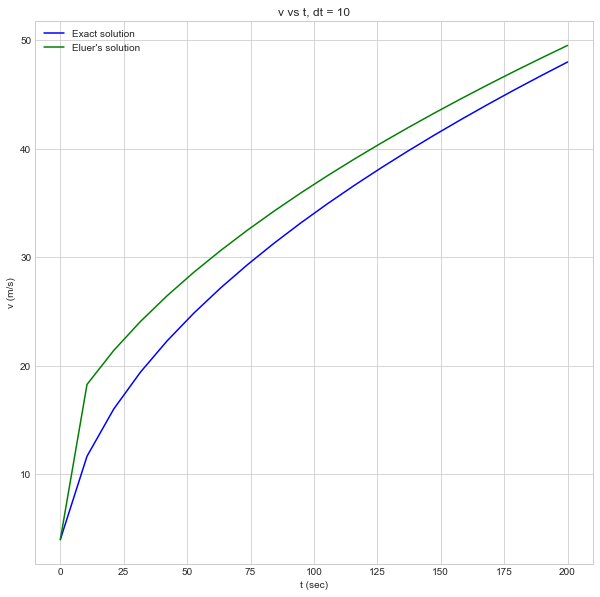

In [3]:
for dt in [0.1, 1, 2, 4, 6, 8, 10]:
    euler( f       = der_1st,
           a       = 0,
           b       = 200,
           dt      = dt,
           x_0     = 4,
           x_exact = v_exact )

## <span style="color:red"> Problem 2 </span>
Add in an air-drag term, -Av<sup>2</sup>, on the right-hand of the equation in Problem 1,  
where A is proportional to the frontal area and the air density.  
Then solve for v(t) using A = 0.15 and compare the result to the solution with A = 0.

### <span style="color:skyblue"> Solution Problem 2</span>

![dv_dt_p_mv_air_drag](images/dv_dt_p_mv_air_drag.png)

In [4]:
################################################################################
######################## der_1st_air_drag ######################################
A = 0.15
def der_1st_air_drag(v, t):
    return( P / (m*v) - A*v**2 )
######################## der_1st_air_drag ######################################
################################################################################

### <span style="color:green"> Final Solution Problem 2</span>
  
### <span style="color:skyblue"> A = 0.15</span>

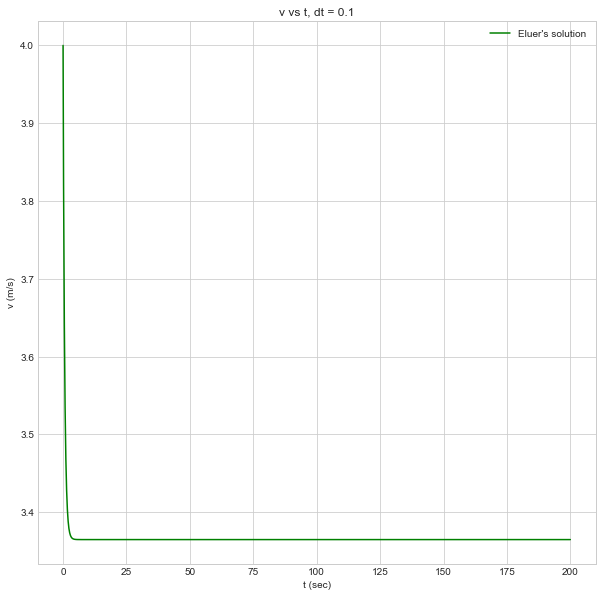

In [5]:
euler( f       = der_1st_air_drag,
       a       = 0,
       b       = 200,
       dt      = 0.1,
       x_0     = 4
     )

### <span style="color:skyblue"> A = 0.15 vs A = 0</span>

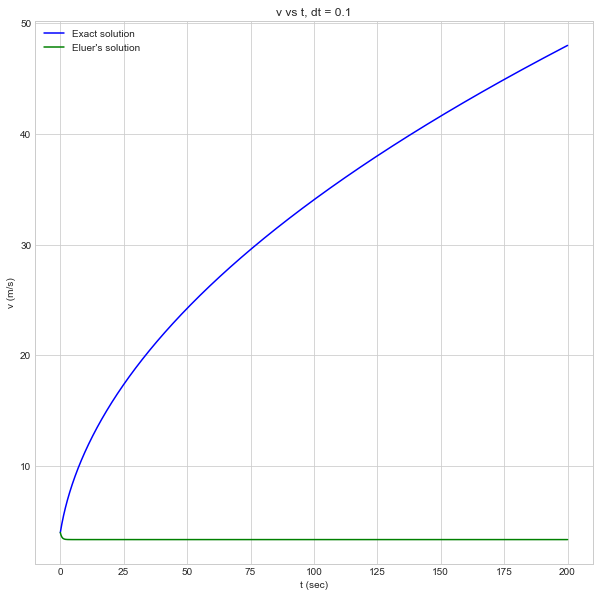

In [6]:
euler( f       = der_1st_air_drag,
       a       = 0,
       b       = 200,
       dt      = 0.1,
       x_0     = 4,
       x_exact = v_exact
     )

## <span style="color:red"> Problem 3 </span>
Show that the Verlet algorithm to solve a 2nd-order ODE,  
![d2x_dt2](images/d2x_dt2.png)  
has an error in the order of magnitude of O(∆t<sup>4</sup>):
![x_t_dt](images/x_t_dt.png)  
Hint: using Taylor expansion for x(t+∆t) and x(t-∆t).

### <span style="color:green"> Final Solution Problem 3</span>

### <span style="color:skyblue"> Solution Problem 3</span>
![solution_problem_3](images/solution_problem_3.png)  